This script performs the analysis of the proteomics data.

In [1]:
import pandas, numpy, seaborn, matplotlib_venn

In [2]:
import sklearn, sklearn.preprocessing, sklearn.decomposition
import scipy, scipy.signal
import statsmodels, statsmodels.stats, statsmodels.stats.multitest

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.family':'sans-serif',
                            'font.size':20, 
                            'xtick.labelsize':30, 
                            'ytick.labelsize':30, 
                            'figure.figsize':(16, 9), 
                            'axes.labelsize':40})

### user-defined variables

In [4]:
four_input_file = '/home/adrian/projects/vigur/data/proteomics/HPMVEC_Proteomics_September_2022/HPMVECs_september2022_4h_all_prts_Relative_Quantification.csv'

### define metadata

In [5]:
metadata = {}

metadata['4h control'] = ['20220905_ARNAR_010', '20220905_ARNAR_011', '20220905_ARNAR_035', '20220905_ARNAR_036', '20220905_ARNAR_058', '20220905_ARNAR_059']

metadata['4h epi'] = ['20220905_ARNAR_004', '20220905_ARNAR_005', '20220905_ARNAR_008', '20220905_ARNAR_009', '20220905_ARNAR_051', '20220905_ARNAR_052']


metadata['4h nor'] = ['20220905_ARNAR_013', '20220905_ARNAR_014', '20220905_ARNAR_019', '20220905_ARNAR_020', '20220905_ARNAR_044', '20220905_ARNAR_046']

metadata['4h epinor'] = ['20220905_ARNAR_024', '20220905_ARNAR_025', '20220905_ARNAR_026', '20220905_ARNAR_027']

metadata['4h TNFa'] = ['20220905_ARNAR_060', '20220905_ARNAR_065']

all_sample_names = [element for sublist in list(metadata.values()) for element in sublist]
print(len(all_sample_names))

24


### read data

In [6]:
df4 = pandas.read_csv(four_input_file, index_col=0, skiprows=2, sep=',')
df4.shape

(3183, 85)

### manipulate data

In [7]:
print(df4.shape)
print(df4[df4['Unique peptides'] > 3].shape)
print(df4[(df4['Unique peptides'] > 3) & (df4['Confidence score'] > 40)].shape)

(3183, 85)
(1295, 85)
(1265, 85)


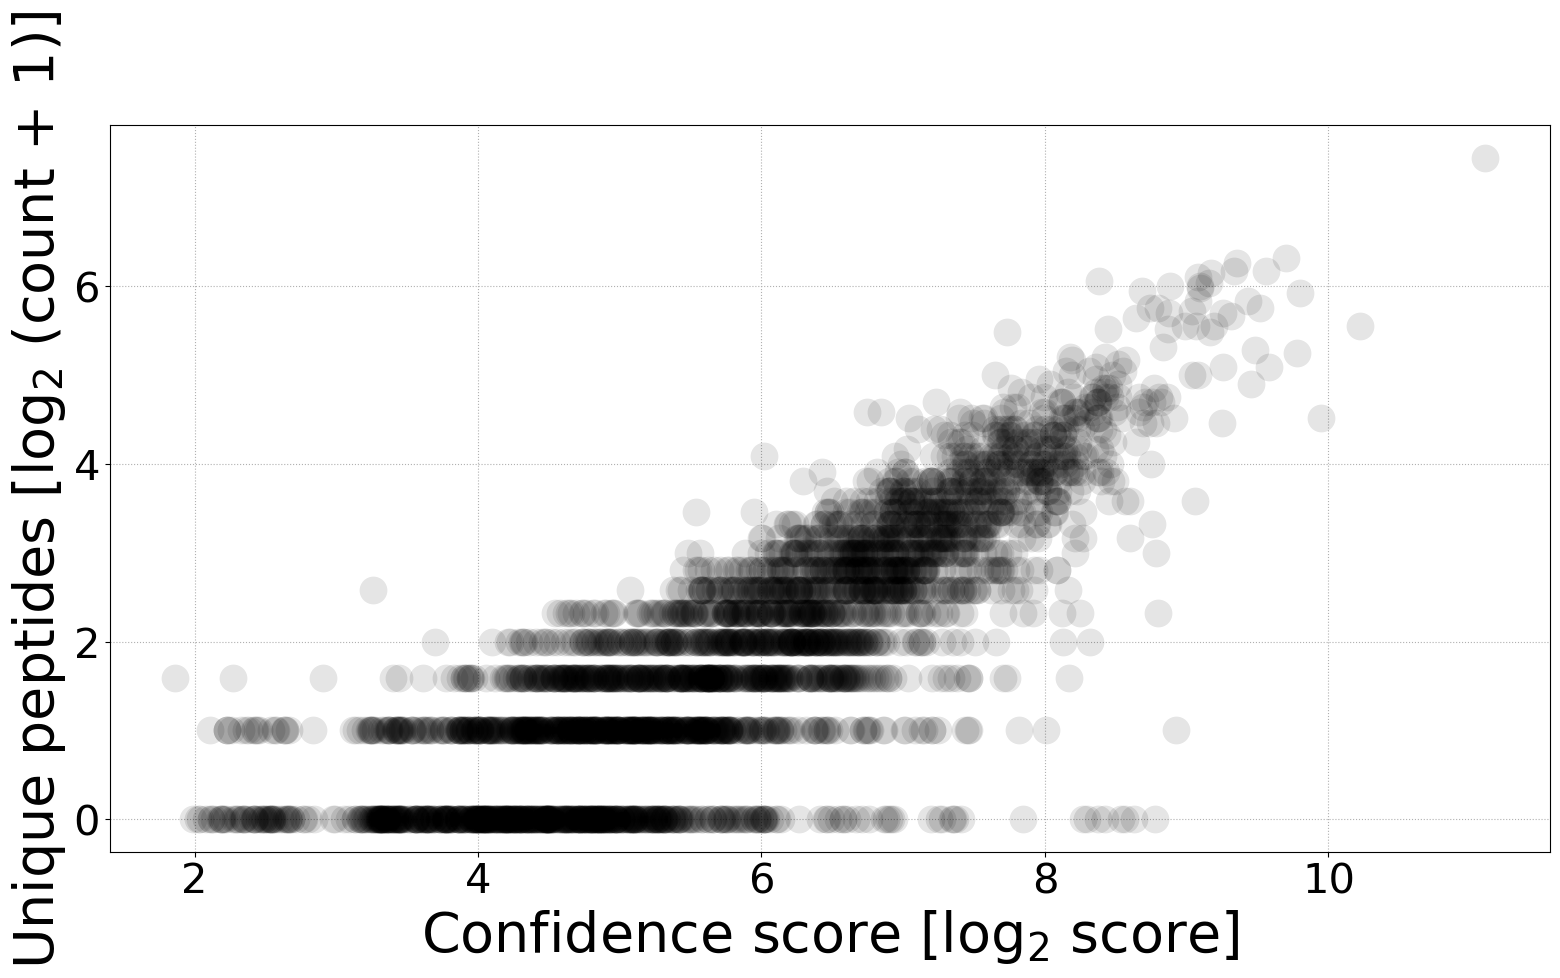

In [8]:
x = numpy.log2(df4['Confidence score'])
y = numpy.log2(df4['Unique peptides']+1)
               
matplotlib.pyplot.plot(x, y, 'o', color='black', alpha=1/10, markeredgecolor='None', ms=20)

matplotlib.pyplot.xlabel('Confidence score [log$_2$ score]')
matplotlib.pyplot.ylabel('Unique peptides [log$_2$ (count + 1)]')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()

Arbitrary thresholds for confident identifications:
- X-axis: log2 CS = 7 which represents a 2\**7 = 128 score.
- Y-axis: log2 unique peptides + 1 = 3 which represents a 2\**(3)-1 = 7 unique peptides.

In [9]:
new4 = df4[(df4['Unique peptides'] >= 7) & (df4['Confidence score'] >= 128)]
print(new4.shape)

working_labels = [label for label in new4.columns if label in all_sample_names]

new4 = numpy.log2(new4.loc[:, working_labels] + 1)
print(new4.shape)
new4

(569, 85)
(569, 24)


,20220905_ARNAR_004,20220905_ARNAR_005,20220905_ARNAR_008,20220905_ARNAR_009,20220905_ARNAR_051,20220905_ARNAR_052,20220905_ARNAR_010,20220905_ARNAR_011,20220905_ARNAR_035,20220905_ARNAR_036,...,20220905_ARNAR_019,20220905_ARNAR_020,20220905_ARNAR_044,20220905_ARNAR_046,20220905_ARNAR_024,20220905_ARNAR_025,20220905_ARNAR_026,20220905_ARNAR_027,20220905_ARNAR_060,20220905_ARNAR_065
Accession,,,,,,,,,,,,,,,,,,,,,
P07996,16.045552,16.078366,16.161570,16.156538,16.229749,16.211154,15.643942,15.675235,15.817460,15.806405,...,16.285414,16.314586,16.509939,16.298168,16.384911,16.406426,16.328664,16.354238,16.145720,16.125135
Q9NVA2,12.240767,12.273150,12.230812,12.246755,12.321591,12.283944,12.229056,12.302041,12.452724,12.257791,...,12.362618,12.350376,12.322057,12.265512,12.272261,12.319145,12.297600,12.287144,12.600883,12.612712
P09382,16.043690,16.115637,16.117788,16.162780,16.369342,16.357563,16.185005,16.186321,16.538914,16.523372,...,16.308708,16.349512,16.634492,16.594343,16.689482,16.719676,16.648384,16.712877,17.017069,16.935930
P08670;O95235,18.548527,18.594227,18.365704,18.401135,18.769989,18.770524,18.262122,18.297352,18.711359,18.702104,...,18.696273,18.744594,18.883915,18.934645,19.082979,19.116051,19.065795,19.135832,19.375205,19.166476
P21589,14.236305,14.287893,14.327785,14.336909,14.448410,14.403935,14.113794,14.151376,14.502139,14.501312,...,14.461924,14.499079,14.841703,14.730324,14.702377,14.704367,14.591211,14.620202,15.063077,14.952013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P49915,12.680081,12.692114,12.765810,12.732837,12.848963,12.815977,12.709541,12.711505,12.841297,12.692557,...,12.696951,12.705768,12.850038,12.886218,12.845724,12.825786,12.765547,12.767343,12.679482,12.905236
P18031,13.711701,13.775002,13.712291,13.738313,14.745789,14.804210,13.757445,13.799717,14.333014,14.314651,...,14.262292,14.327880,14.556140,14.271732,14.084215,14.125955,14.223263,14.268793,14.512509,13.644973
Q06323,11.854487,11.791975,11.886068,11.874950,11.765173,11.656666,11.955888,11.850552,11.867215,11.765737,...,11.617859,11.592352,11.752562,12.165017,11.717026,11.684389,11.821624,11.779782,11.525348,12.207274


### visualize data

200
19.492541086884188


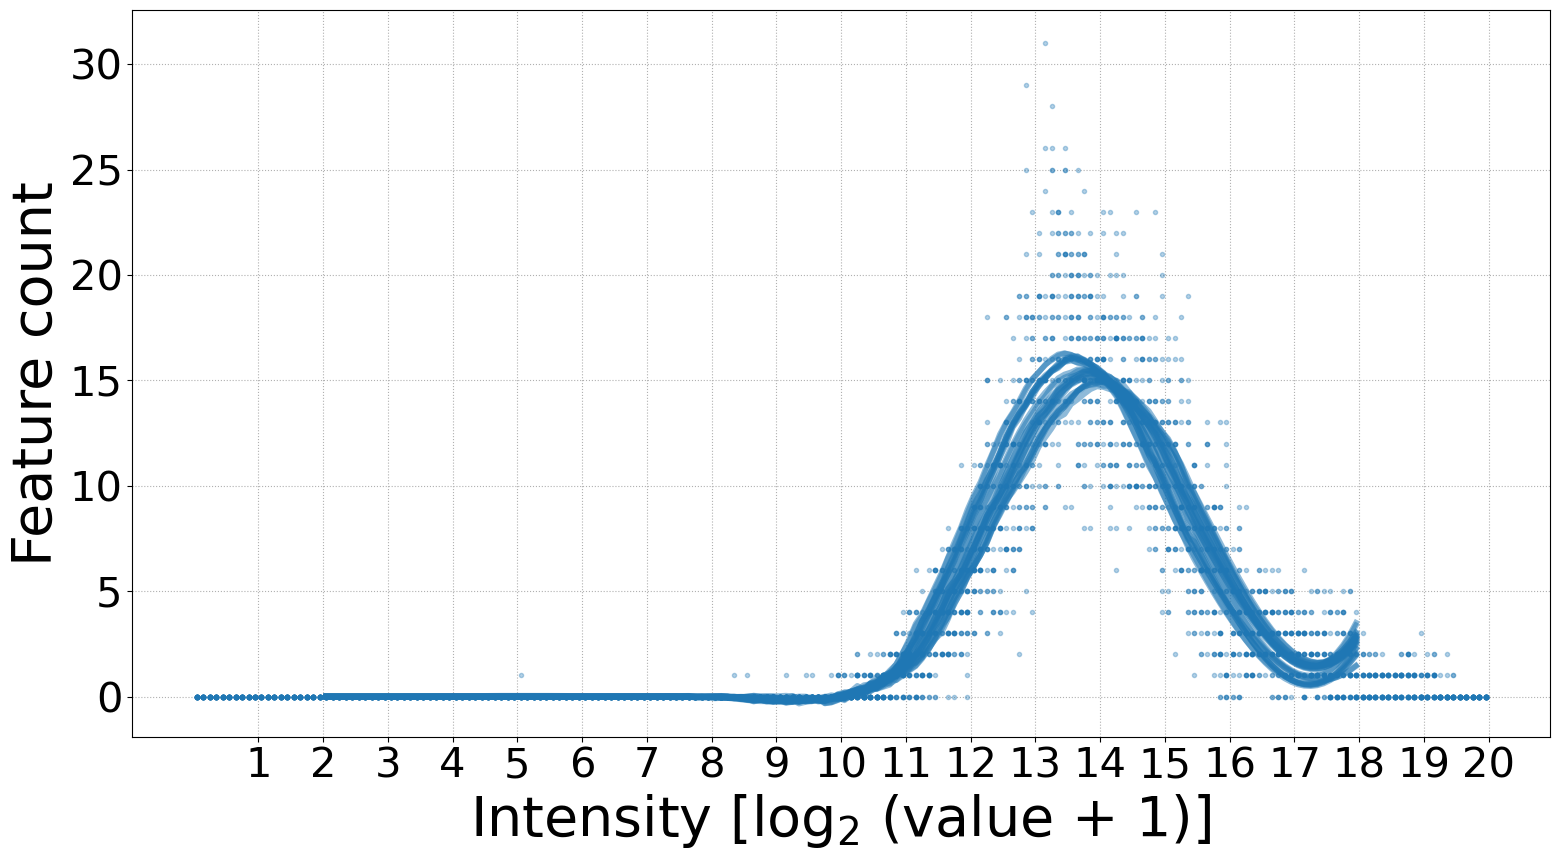

In [10]:
found_max = 20
number_of_bins = found_max * 10
margin = 20
print(number_of_bins)

absolute_max = 0
plotting_x = []; plotting_y = []
most_likely_early = []

for sample in new4.columns:
        
    intensities = new4.loc[:, sample]
    
    # histogram
    hist, bin_edges = numpy.histogram(intensities, bins=number_of_bins, range=(0, found_max))
    half_bin = (bin_edges[1] - bin_edges[0])/2
    x = bin_edges + half_bin
    x = x[:-1]
    
    # curve fitting
    plotting_x = x[margin:-margin]
    plotting_hist = hist[margin:-margin]
    yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)
    
    # storing info to quantify bias
    most_likely_intensity = x[numpy.argmax(yhat)]
    most_likely_early.append(most_likely_intensity)
    
    
    # plotting
    the_color = 'tab:blue'
    matplotlib.pyplot.plot(x, hist, '.', alpha=1/3, color=the_color)
    matplotlib.pyplot.plot(plotting_x, yhat, '-', lw=4, alpha=1/2, color=the_color)
    
    # check
    if max(intensities) > absolute_max:
        absolute_max = max(intensities)

# check print
print(absolute_max)

matplotlib.pyplot.xticks(range(1, 21))
matplotlib.pyplot.xlabel('Intensity [log$_2$ (value + 1)]')
matplotlib.pyplot.ylabel('Feature count')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()

### normalization

In [11]:
#
# quantile normalization 
# taken from https://cmdlinetips.com/2020/06/computing-quantile-normalization-in-python/
#

# step 1/3: sorting sample values
df_sorted = pandas.DataFrame(numpy.sort(new4.values, axis=0), index=new4.index, columns=new4.columns)
# step 2/3: averaging rank values across samples
df_mean = df_sorted.mean(axis=1)
df_mean.index = numpy.arange(1, len(df_mean) + 1)
# step 3/3: re-ordering samples
qndf = new4.rank(method="min").stack().astype(int).map(df_mean).unstack()

### distributions after normalization

In [12]:
qndf

,20220905_ARNAR_004,20220905_ARNAR_005,20220905_ARNAR_008,20220905_ARNAR_009,20220905_ARNAR_051,20220905_ARNAR_052,20220905_ARNAR_010,20220905_ARNAR_011,20220905_ARNAR_035,20220905_ARNAR_036,...,20220905_ARNAR_019,20220905_ARNAR_020,20220905_ARNAR_044,20220905_ARNAR_046,20220905_ARNAR_024,20220905_ARNAR_025,20220905_ARNAR_026,20220905_ARNAR_027,20220905_ARNAR_060,20220905_ARNAR_065
Accession,,,,,,,,,,,,,,,,,,,,,
P07996,16.444593,16.372551,16.421613,16.344206,16.080066,16.127816,16.021224,15.963456,15.660162,15.681853,...,16.372551,16.372551,16.127816,15.940934,16.204469,16.296996,16.204469,16.204469,15.940934,15.761133
Q9NVA2,12.434871,12.456149,12.336856,12.346069,12.285075,12.250109,12.326933,12.397336,12.356357,12.234980,...,12.409891,12.397336,12.190972,12.190972,12.250109,12.285075,12.262244,12.250109,12.570391,12.517345
P09382,16.393933,16.462837,16.344206,16.393933,16.204469,16.344206,16.519916,16.482092,16.444593,16.502481,...,16.421613,16.421613,16.372551,16.393933,16.568323,16.600260,16.542327,16.542327,16.777160,16.568323
P08670;O95235,18.804393,18.804393,18.804393,18.804393,18.648104,18.804393,18.804393,18.648104,18.510957,18.648104,...,18.804393,18.804393,18.648104,18.804393,18.804393,18.804393,18.804393,18.804393,19.071344,18.648104
P21589,14.589608,14.632309,14.561786,14.561786,14.314120,14.314120,14.314120,14.339338,14.404885,14.417469,...,14.539264,14.561786,14.607391,14.495178,14.678034,14.678034,14.530183,14.539264,14.876730,14.622398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P49915,12.912490,12.926596,12.919233,12.886226,12.700577,12.762951,12.809021,12.783815,12.775013,12.657012,...,12.783815,12.800439,12.689583,12.682238,12.848151,12.818666,12.726710,12.689583,12.667309,12.742172
P18031,13.981082,14.071661,13.915843,13.937850,14.589608,14.706134,13.946923,13.957641,14.201544,14.221037,...,14.344873,14.396689,14.299028,14.035895,14.079004,14.103276,14.141111,14.162695,14.371221,13.416749
Q06323,11.979754,11.950973,12.004843,12.027725,11.766110,11.672779,12.027725,11.931712,11.766110,11.746268,...,11.722760,11.700459,11.555518,12.084835,11.746268,11.672779,11.783479,11.722760,11.504958,12.144236


200
19.071343768957153


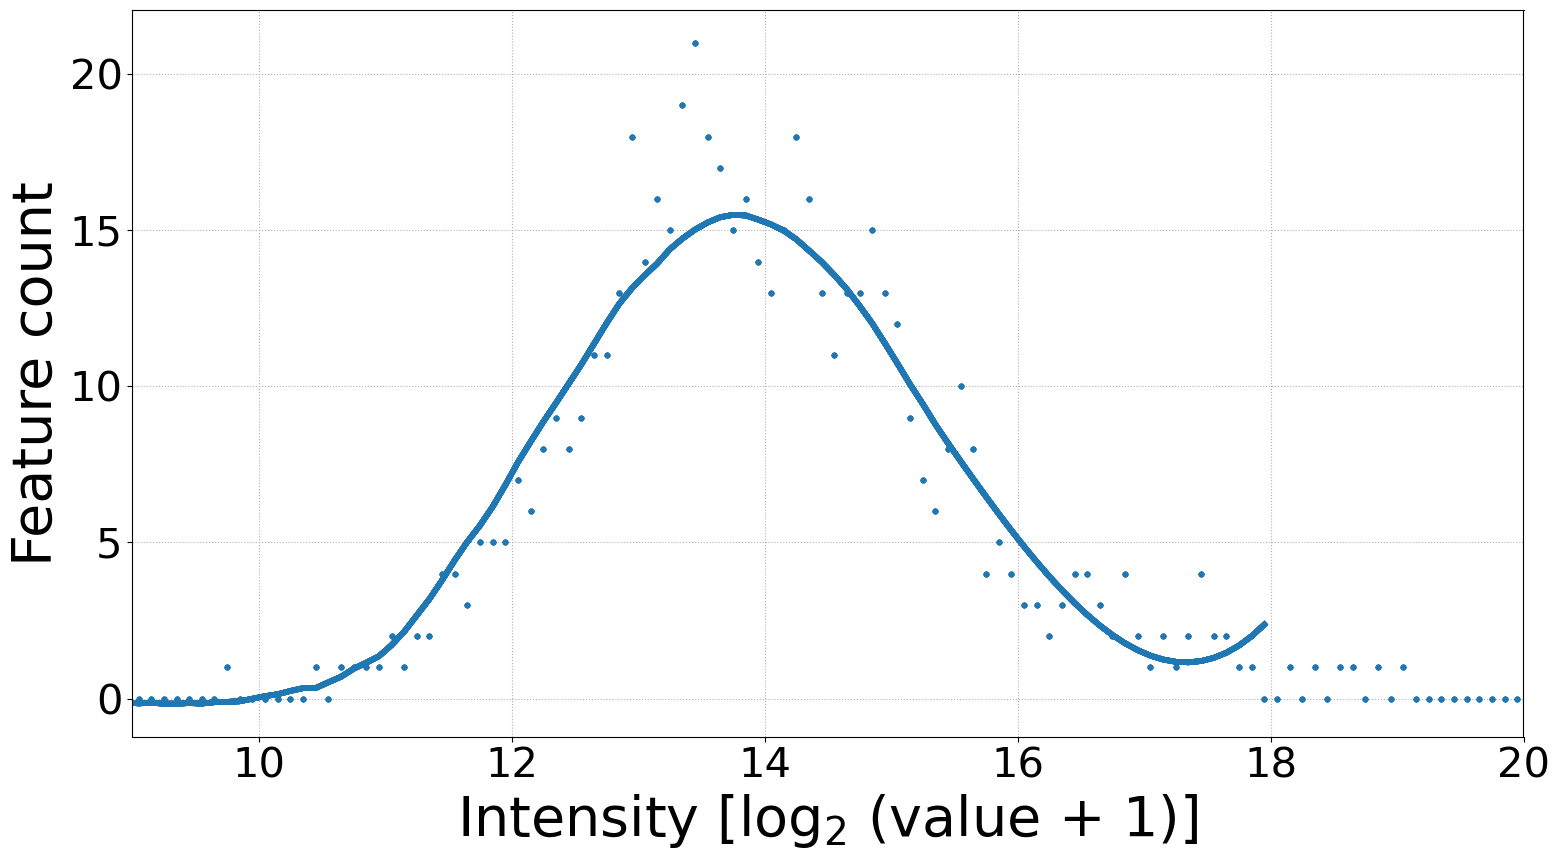

In [13]:
found_max = 20
number_of_bins = found_max * 10
margin = 20
print(number_of_bins)

absolute_max = 0
plotting_x = []; plotting_y = []
most_likely_early = []

for sample in qndf.columns:
        
    intensities = qndf.loc[:, sample]
    
    # histogram
    hist, bin_edges = numpy.histogram(intensities, bins=number_of_bins, range=(0, found_max))
    half_bin = (bin_edges[1] - bin_edges[0])/2
    x = bin_edges + half_bin
    x = x[:-1]
    
    # curve fitting
    plotting_x = x[margin:-margin]
    plotting_hist = hist[margin:-margin]
    yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)
    
    # storing info to quantify bias
    most_likely_intensity = x[numpy.argmax(yhat)]
    most_likely_early.append(most_likely_intensity)
    
    
    # plotting
    the_color = 'tab:blue'
    matplotlib.pyplot.plot(x, hist, '.', alpha=1/3, color=the_color)
    matplotlib.pyplot.plot(plotting_x, yhat, '-', lw=4, alpha=1/2, color=the_color)
    
    # check
    if max(intensities) > absolute_max:
        absolute_max = max(intensities)

# check print
print(absolute_max)

#matplotlib.pyplot.xticks(range(1, 21))
matplotlib.pyplot.xlim(9,20)

matplotlib.pyplot.xlabel('Intensity [log$_2$ (value + 1)]')
matplotlib.pyplot.ylabel('Feature count')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()

### PCA

In [14]:
qndf

,20220905_ARNAR_004,20220905_ARNAR_005,20220905_ARNAR_008,20220905_ARNAR_009,20220905_ARNAR_051,20220905_ARNAR_052,20220905_ARNAR_010,20220905_ARNAR_011,20220905_ARNAR_035,20220905_ARNAR_036,...,20220905_ARNAR_019,20220905_ARNAR_020,20220905_ARNAR_044,20220905_ARNAR_046,20220905_ARNAR_024,20220905_ARNAR_025,20220905_ARNAR_026,20220905_ARNAR_027,20220905_ARNAR_060,20220905_ARNAR_065
Accession,,,,,,,,,,,,,,,,,,,,,
P07996,16.444593,16.372551,16.421613,16.344206,16.080066,16.127816,16.021224,15.963456,15.660162,15.681853,...,16.372551,16.372551,16.127816,15.940934,16.204469,16.296996,16.204469,16.204469,15.940934,15.761133
Q9NVA2,12.434871,12.456149,12.336856,12.346069,12.285075,12.250109,12.326933,12.397336,12.356357,12.234980,...,12.409891,12.397336,12.190972,12.190972,12.250109,12.285075,12.262244,12.250109,12.570391,12.517345
P09382,16.393933,16.462837,16.344206,16.393933,16.204469,16.344206,16.519916,16.482092,16.444593,16.502481,...,16.421613,16.421613,16.372551,16.393933,16.568323,16.600260,16.542327,16.542327,16.777160,16.568323
P08670;O95235,18.804393,18.804393,18.804393,18.804393,18.648104,18.804393,18.804393,18.648104,18.510957,18.648104,...,18.804393,18.804393,18.648104,18.804393,18.804393,18.804393,18.804393,18.804393,19.071344,18.648104
P21589,14.589608,14.632309,14.561786,14.561786,14.314120,14.314120,14.314120,14.339338,14.404885,14.417469,...,14.539264,14.561786,14.607391,14.495178,14.678034,14.678034,14.530183,14.539264,14.876730,14.622398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P49915,12.912490,12.926596,12.919233,12.886226,12.700577,12.762951,12.809021,12.783815,12.775013,12.657012,...,12.783815,12.800439,12.689583,12.682238,12.848151,12.818666,12.726710,12.689583,12.667309,12.742172
P18031,13.981082,14.071661,13.915843,13.937850,14.589608,14.706134,13.946923,13.957641,14.201544,14.221037,...,14.344873,14.396689,14.299028,14.035895,14.079004,14.103276,14.141111,14.162695,14.371221,13.416749
Q06323,11.979754,11.950973,12.004843,12.027725,11.766110,11.672779,12.027725,11.931712,11.766110,11.746268,...,11.722760,11.700459,11.555518,12.084835,11.746268,11.672779,11.783479,11.722760,11.504958,12.144236


[0.32074252 0.16428529]


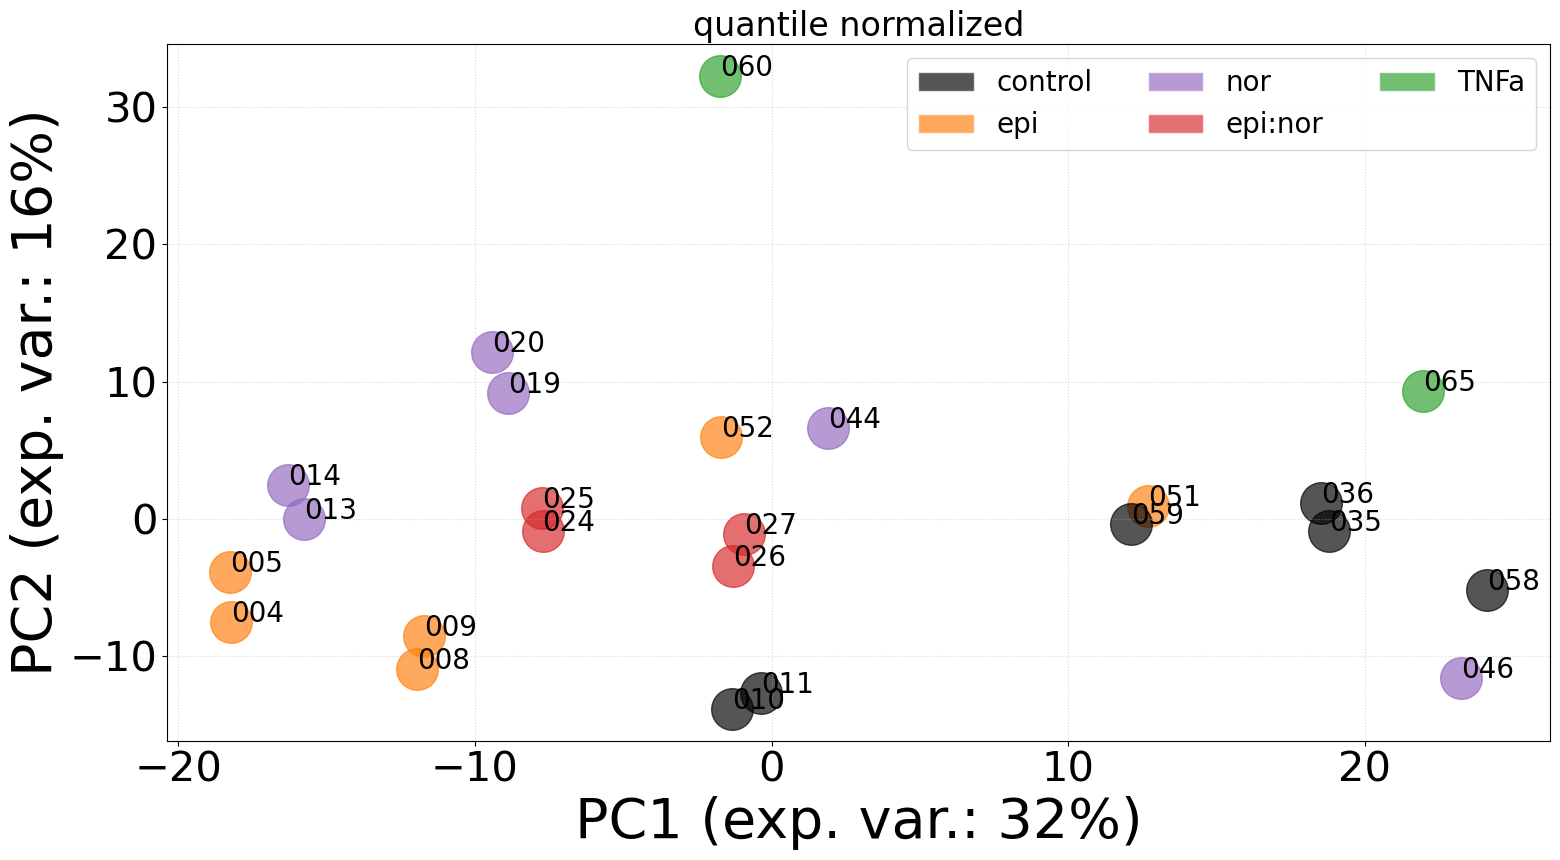

In [15]:
# quantile normalized all
transpose = qndf.transpose()
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(transpose)
model = sklearn.decomposition.PCA(n_components=2)
locations = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

for i in range(len(locations)):
    
    the_marker = 'o'
    the_label = qndf.columns[i].split('_')[-1]
        
    if qndf.columns[i] in metadata['4h control']:
        the_color = 'black'
    elif qndf.columns[i] in metadata['4h epi']:
        the_color = 'tab:orange'
    elif qndf.columns[i] in metadata['4h nor']:
        the_color = 'tab:purple'
    elif qndf.columns[i] in metadata['4h epinor']:
        the_color = 'tab:red'
    elif qndf.columns[i] in metadata['4h TNFa']:
        the_color = 'tab:green'
    else:
        raise ValueError('sample not classified')
    
    matplotlib.pyplot.scatter(locations[i,0], locations[i,1], s=900, c=the_color, marker=the_marker, alpha=2/3)
    matplotlib.pyplot.text(locations[i, 0], locations[i, 1], the_label)
    
    
legend_elements = [ 
    matplotlib.patches.Patch(facecolor='black', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:orange', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:purple', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:green', edgecolor='white', alpha=2/3)
]
matplotlib.pyplot.legend(legend_elements, ['control', 'epi', 'nor', 'epi:nor', 'TNFa'], ncol=3)

matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.title('quantile normalized')
matplotlib.pyplot.tight_layout()

[0.66790225 0.09130635]


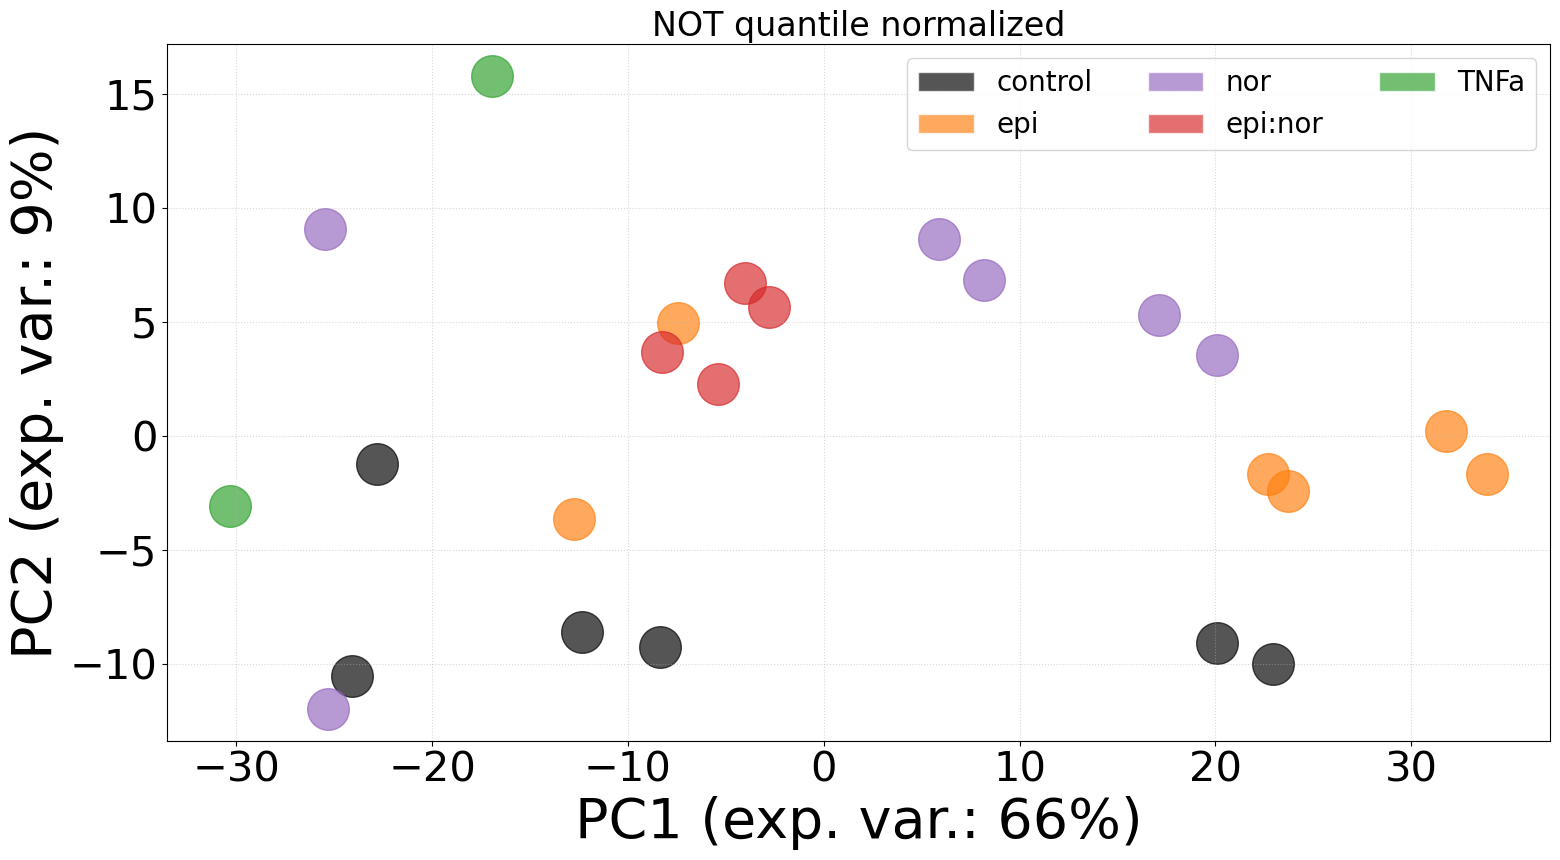

In [16]:
# non-quantile normalized all
transpose = new4.transpose()
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(transpose)
model = sklearn.decomposition.PCA(n_components=2)
locations = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

for i in range(len(locations)):
    
    the_marker = 'o'
        
    if qndf.columns[i] in metadata['4h control']:
        the_color = 'black'
    elif qndf.columns[i] in metadata['4h epi']:
        the_color = 'tab:orange'
    elif qndf.columns[i] in metadata['4h nor']:
        the_color = 'tab:purple'
    elif qndf.columns[i] in metadata['4h epinor']:
        the_color = 'tab:red'
    elif qndf.columns[i] in metadata['4h TNFa']:
        the_color = 'tab:green'
    else:
        raise ValueError('sample not classified')
        
    matplotlib.pyplot.scatter(locations[i,0], locations[i,1], s=900, c=the_color, marker=the_marker, alpha=2/3)
    
legend_elements = [
    matplotlib.patches.Patch(facecolor='black', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:orange', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:purple', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:green', edgecolor='white', alpha=2/3)
]
matplotlib.pyplot.legend(legend_elements, ['control', 'epi', 'nor', 'epi:nor', 'TNFa'], ncol=3)

matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.title('NOT quantile normalized')

matplotlib.pyplot.tight_layout()

10
['20220905_ARNAR_060', '20220905_ARNAR_065', '20220905_ARNAR_052', '20220905_ARNAR_044', '20220905_ARNAR_051', '20220905_ARNAR_059', '20220905_ARNAR_036', '20220905_ARNAR_035', '20220905_ARNAR_058', '20220905_ARNAR_046']
[0.26791677 0.23161099]


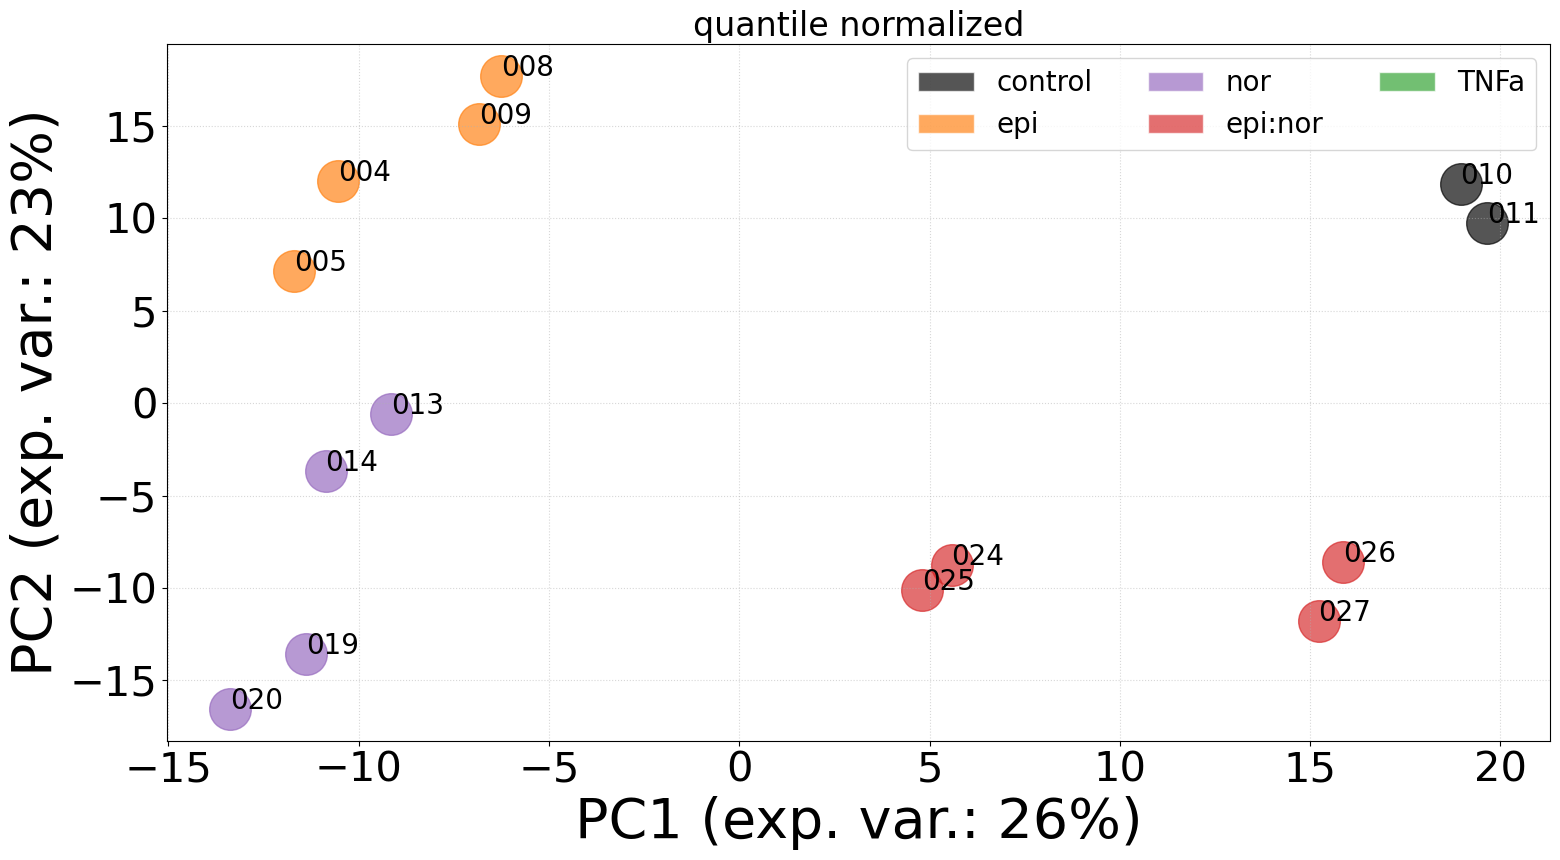

In [17]:
# excluding arbitrary samples

excluded_sample_tags = ['060', '065', '052', '044', '051', '059', '036', '035', '058', '046']
print(len(excluded_sample_tags)) # should be 10
excluded_samples = ['20220905_ARNAR_' + element for element in excluded_sample_tags]
print(excluded_samples)
simplified_df = qndf.drop(excluded_samples, axis=1)

transpose = simplified_df.transpose()
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(transpose)
model = sklearn.decomposition.PCA(n_components=2)
locations = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

for i in range(len(locations)):
    
    the_marker = 'o'
    the_label = simplified_df.columns[i].split('_')[-1]
        
    if simplified_df.columns[i] in metadata['4h control']:
        the_color = 'black'
    elif simplified_df.columns[i] in metadata['4h epi']:
        the_color = 'tab:orange'
    elif simplified_df.columns[i] in metadata['4h nor']:
        the_color = 'tab:purple'
    elif simplified_df.columns[i] in metadata['4h epinor']:
        the_color = 'tab:red'
    elif simplified_df.columns[i] in metadata['4h TNFa']:
        the_color = 'tab:green'
    else:
        raise ValueError('sample not classified')
    
    matplotlib.pyplot.scatter(locations[i,0], locations[i,1], s=900, c=the_color, marker=the_marker, alpha=2/3)
    matplotlib.pyplot.text(locations[i, 0], locations[i, 1], the_label)
    
    
legend_elements = [ 
    matplotlib.patches.Patch(facecolor='black', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:orange', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:purple', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:green', edgecolor='white', alpha=2/3)
]
matplotlib.pyplot.legend(legend_elements, ['control', 'epi', 'nor', 'epi:nor', 'TNFa'], ncol=3)

matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.title('quantile normalized')
matplotlib.pyplot.tight_layout()

### make comparisons

In [18]:
def comparison_function(treatment_label, treatment_color, control_samples, treated_samples):
    
    # f.1. determine P values
    fold_changes = []; pvalues = []

    for protein in simplified_df.index:
        control_values = simplified_df.loc[protein, control_samples].values
        treated_values = simplified_df.loc[protein, treated_samples].values

        log2FC = numpy.median(treated_values) - numpy.median(control_values)
        statistic, pvalue = scipy.stats.ttest_ind(control_values, treated_values)
        # dealing with exact same values on two samples
        if numpy.isnan(pvalue):
            pvalue = 1
        fold_changes.append(log2FC); pvalues.append(pvalue)

    print('P before correction', numpy.min(pvalues), numpy.max(pvalues))
    
    # f.2. Bonferroni correction
    significance_threshold = -numpy.log10(0.05/simplified_df.shape[0])
    a = numpy.array(pvalues)
    epsilon = -numpy.log10(numpy.min(a[a.nonzero()])/2)
    print(epsilon)

    plotting_p = []
    for element in pvalues:
        if element  == 0:
            plotting_p.append(epsilon)
        else:
            plotting_p.append(-numpy.log10(element))

    matplotlib.pyplot.plot(fold_changes, plotting_p, 'o', color='black', alpha=1/3, mec='None', ms=15)
    matplotlib.pyplot.axhline(y=significance_threshold, ls='--', lw=2, color='black', alpha=0.5)
    matplotlib.pyplot.ylabel('-log$_{10}$ P')
    matplotlib.pyplot.xlabel('log$_2$ FC')
    matplotlib.pyplot.grid(alpha=0.5, ls=':')
    matplotlib.pyplot.title('{} Bonferroni'.format(treatment_label))
    matplotlib.pyplot.xticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5])
    matplotlib.pyplot.show()
    
    # f.3. Benjamini-Hochberg
    print('Benjamini-Hochberg correction')
    correction_model = statsmodels.stats.multitest.multipletests(pvalues, method='fdr_bh', alpha=0.1)
    a = numpy.array(correction_model[1])
    epsilon = -numpy.log10(numpy.min(a[a.nonzero()])/2)
    print('epsilon: {}'.format(epsilon))

    responding_proteins = []
    for i in range(len(correction_model[0])):

        # dealing with numerical value
        if correction_model[1][i] == 0:
            plotting_p = epsilon
        else:
            plotting_p = -numpy.log10(correction_model[1][i])

        # dealing with color
        if correction_model[0][i] == True and numpy.abs(fold_changes[i]) > numpy.log2(1.2):
            plotting_color = treatment_color
            protein_id = simplified_df.index[i]
            description = df4.loc[protein_id, 'Description'].split(' OS')[0]
            responding_proteins.append(protein_id)
            print('\t {} {} [{:.2f}, {:.2f}]'.format(protein_id, description, fold_changes[i], plotting_p))
        else:
            plotting_color = 'black'

        # plot
        matplotlib.pyplot.plot(fold_changes[i], plotting_p, 'o', color=plotting_color, alpha=1/3, mec='None', ms=15)

    matplotlib.pyplot.ylabel('-log$_{10}$ Q')
    matplotlib.pyplot.xlabel('log$_2$ FC')
    matplotlib.pyplot.grid(alpha=0.5, ls=':')
    matplotlib.pyplot.title('{} Benjamini-Hochberg'.format(treatment_label))
    matplotlib.pyplot.xticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5])
    matplotlib.pyplot.show()

    print('{} proteins respond to treatment'.format(len(responding_proteins)))
    
    return responding_proteins

P before correction 0.0 1.0
5.508850612165936


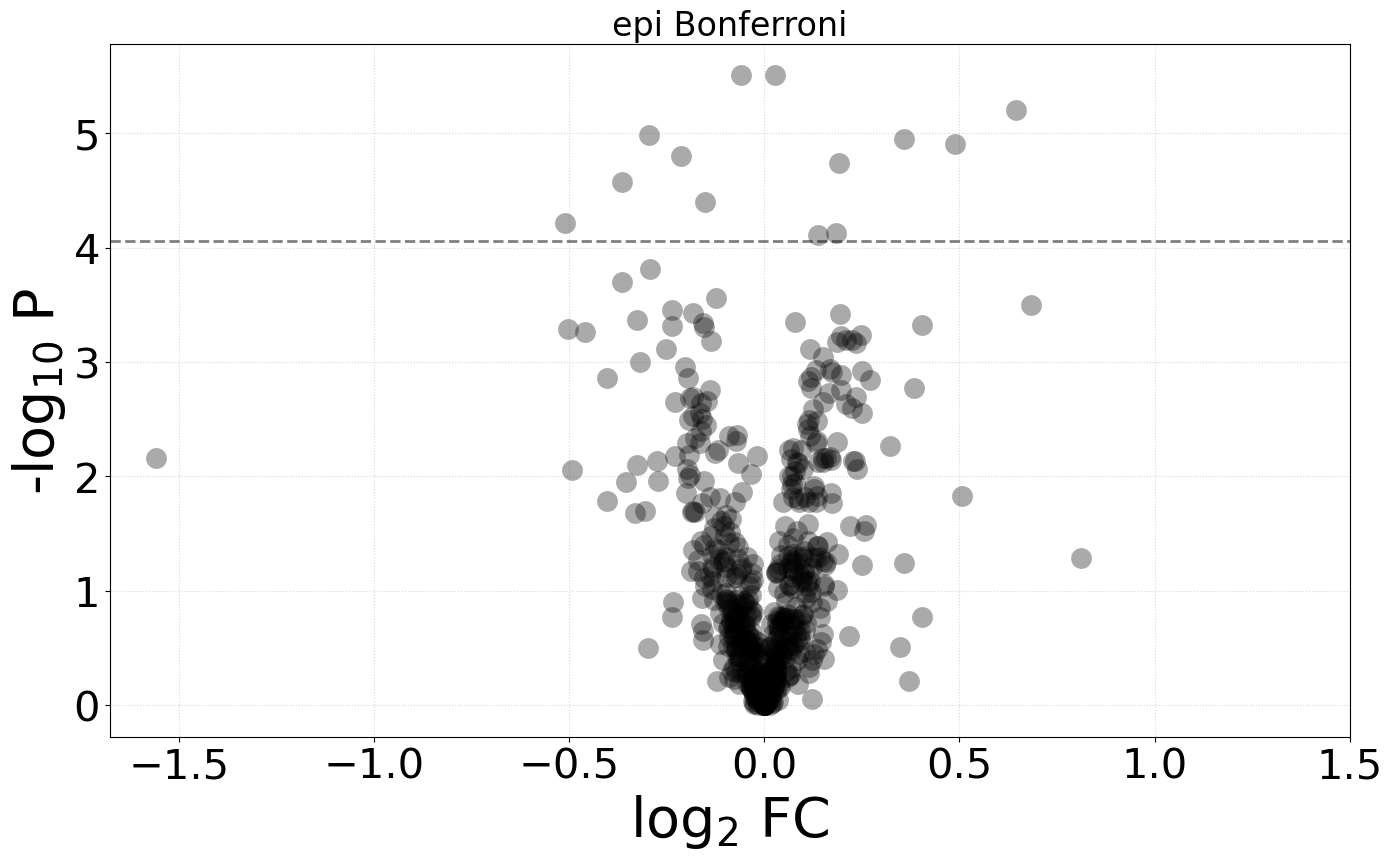

Benjamini-Hochberg correction
epsilon: 3.230859600490528
	 P07996 Thrombospondin-1 [0.40, 1.97]
	 Q15393 Splicing factor 3B subunit 3 [0.32, 1.46]
	 P31943 Heterogeneous nuclear ribonucleoprotein H [-0.32, 1.84]
	 P29966 Myristoylated alanine-rich C-kinase substrate [0.68, 1.98]
	 Q5JSZ5 Protein PRRC2B [0.51, 1.20]
	 Q9P2E9 Ribosome-binding protein 1 [-0.50, 1.97]
	 Q58FG0 Putative heat shock protein HSP 90-alpha A5 [-0.49, 1.36]
	 Q9UKX3;Q6PJF5 Myosin-13 [-0.51, 2.50]
	 P29692 Elongation factor 1-delta [0.64, 2.93]
	 O94964 Protein SOGA1 [0.27, 1.78]
	 P04350 Tubulin beta-4A chain [-1.56, 1.40]
	 Q58FF8 Putative heat shock protein HSP 90-beta 2 [-0.29, 2.20]
	 Q6S8J3;Q9BYX7 POTE ankyrin domain family member E [-0.40, 1.18]
	 P35241 Radixin [-0.33, 1.97]
	 P67936 Tropomyosin alpha-4 chain [0.36, 2.93]
	 P27797 Calreticulin [-0.28, 1.40]
	 Q96G03 Phosphoglucomutase-2 [-0.33, 1.11]
	 Q15008 26S proteasome non-ATPase regulatory subunit 6 [-0.29, 2.93]
	 P23634 Plasma membrane calcium-tran

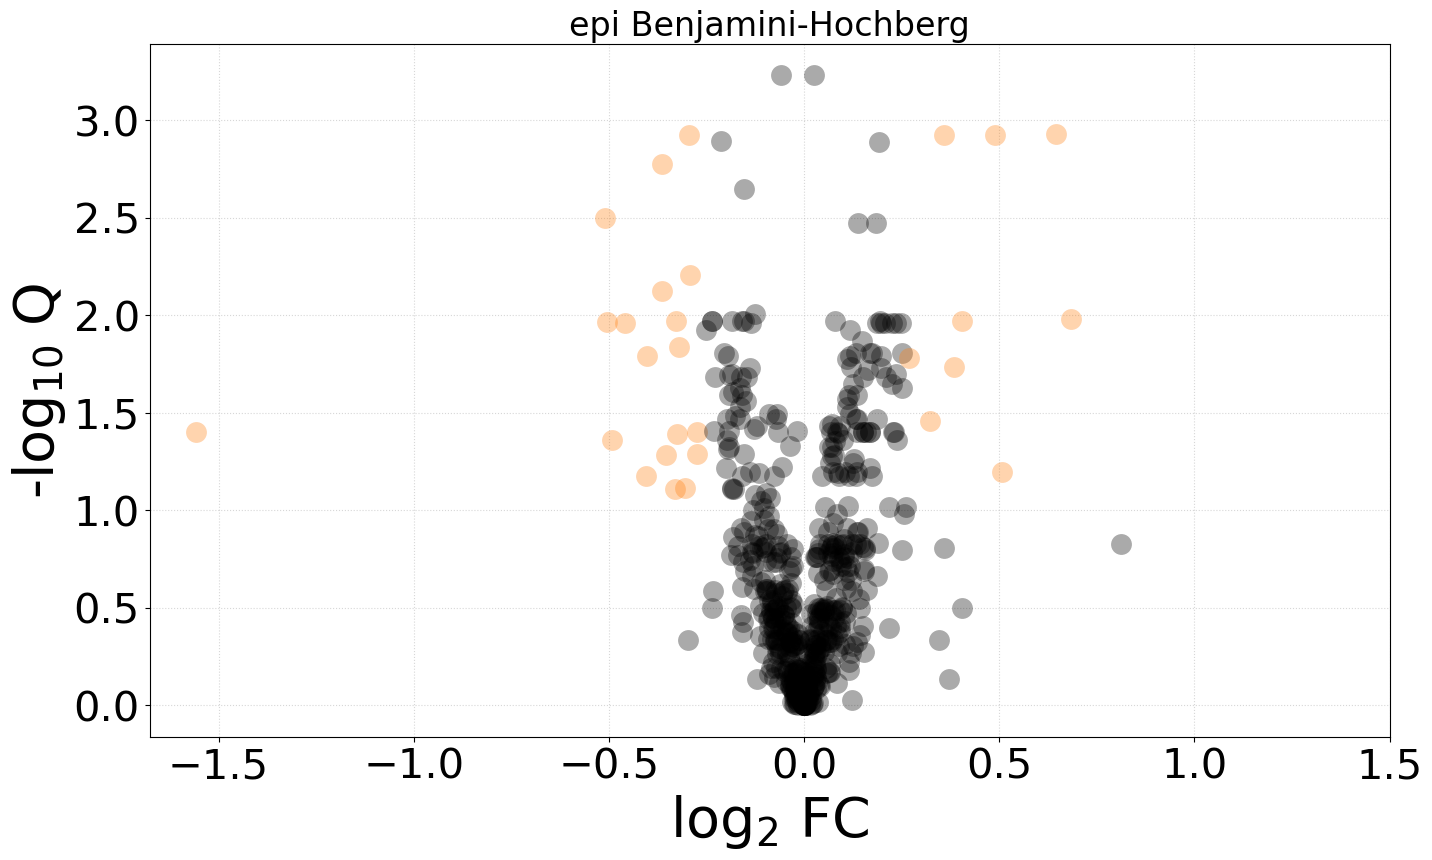

28 proteins respond to treatment


In [19]:
treatment_label = 'epi'
treatment_color = 'tab:orange'
control_samples = ['20220905_ARNAR_' + element for element in ['010', '011']]
treated_samples = ['20220905_ARNAR_' + element for element in ['005', '004', '009', '008']]
epi_response = comparison_function(treatment_label, treatment_color, control_samples, treated_samples)

P before correction 0.0 1.0
5.378583743186074


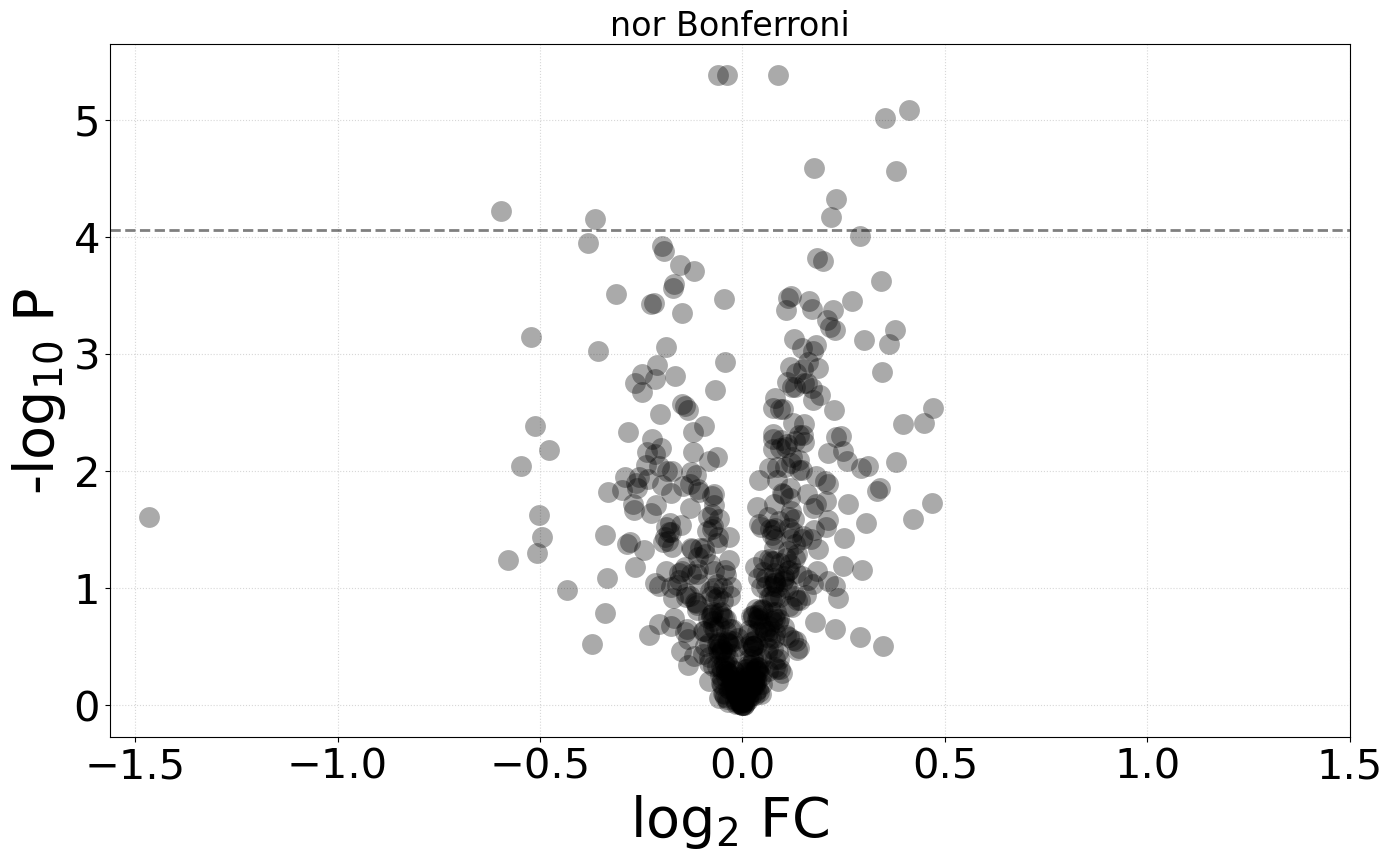

Benjamini-Hochberg correction
epsilon: 3.2604438217674714
	 P07996 Thrombospondin-1 [0.38, 2.65]
	 P21589 5'-nucleotidase [0.29, 1.36]
	 Q15393 Splicing factor 3B subunit 3 [0.38, 1.38]
	 Q5M9N0 Coiled-coil domain-containing protein 158 [0.40, 1.56]
	 P29966 Myristoylated alanine-rich C-kinase substrate [0.47, 1.65]
	 Q5JSZ5 Protein PRRC2B [0.45, 1.56]
	 P61160 Actin-related protein 2 [0.38, 2.03]
	 Q2TAC2 Coiled-coil domain-containing protein 57 [0.34, 2.17]
	 Q9P2E9 Ribosome-binding protein 1 [-0.55, 1.36]
	 Q58FG0 Putative heat shock protein HSP 90-alpha A5 [-0.60, 2.44]
	 Q9UKX3;Q6PJF5 Myosin-13 [-0.51, 1.56]
	 P53675 Clathrin heavy chain 2 [0.35, 2.96]
	 P29692 Elongation factor 1-delta [0.42, 1.09]
	 O00232 26S proteasome non-ATPase regulatory subunit 12 [0.30, 1.98]
	 P04350 Tubulin beta-4A chain [-1.47, 1.10]
	 Q04637 Eukaryotic translation initiation factor 4 gamma 1 [0.29, 2.33]
	 Q58FF8 Putative heat shock protein HSP 90-beta 2 [-0.31, 2.15]
	 P61981 14-3-3 protein gamma [0.

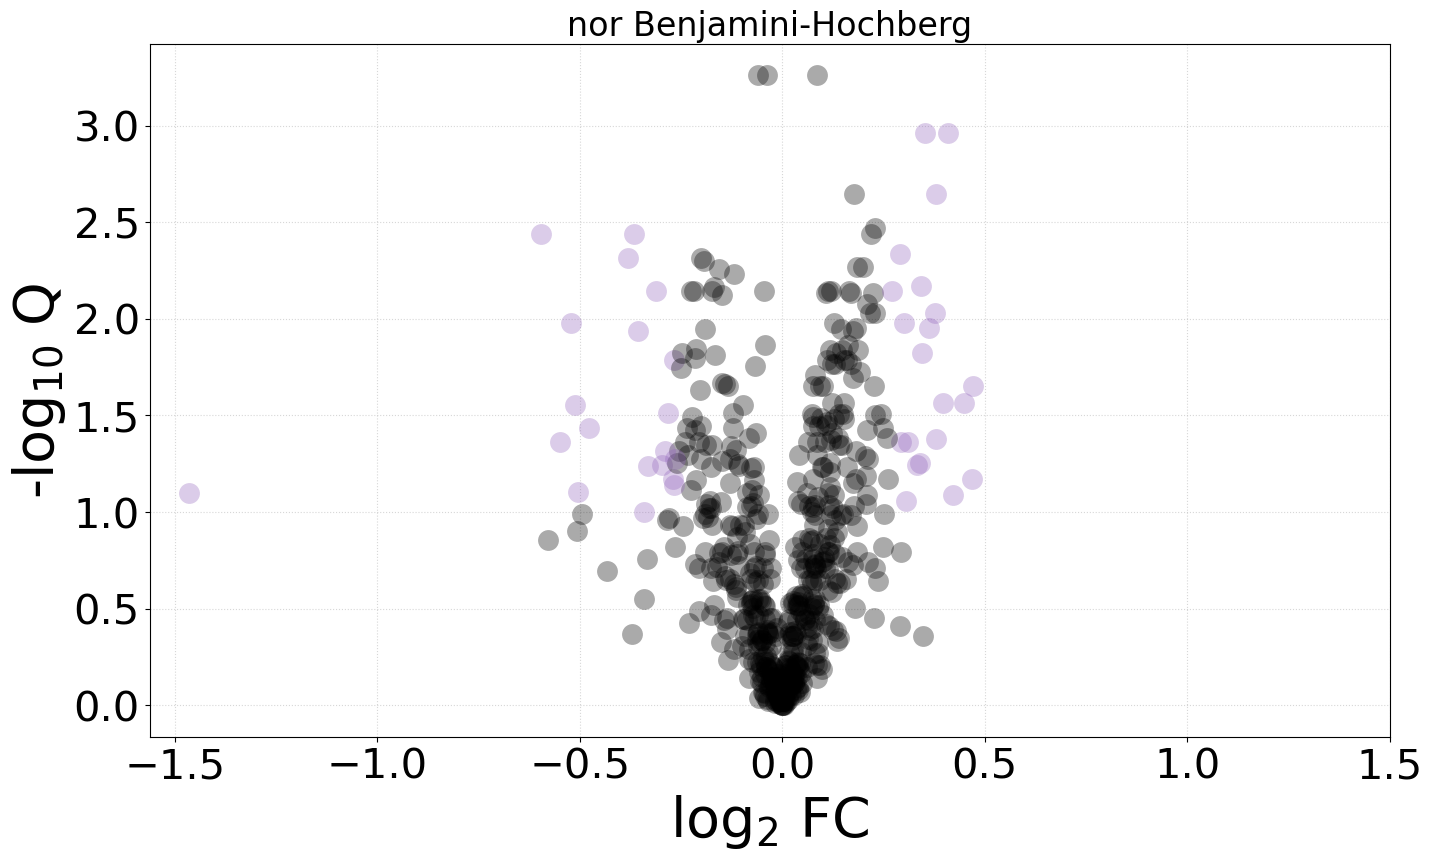

41 proteins respond to treatment


In [20]:
treatment_label = 'nor'
treatment_color = 'tab:purple'
control_samples = ['20220905_ARNAR_' + element for element in ['010', '011']]
treated_samples = ['20220905_ARNAR_' + element for element in ['020', '019', '014', '013']]
nor_response = comparison_function(treatment_label, treatment_color, control_samples, treated_samples)

P before correction 0.0 1.0
5.98340844178458


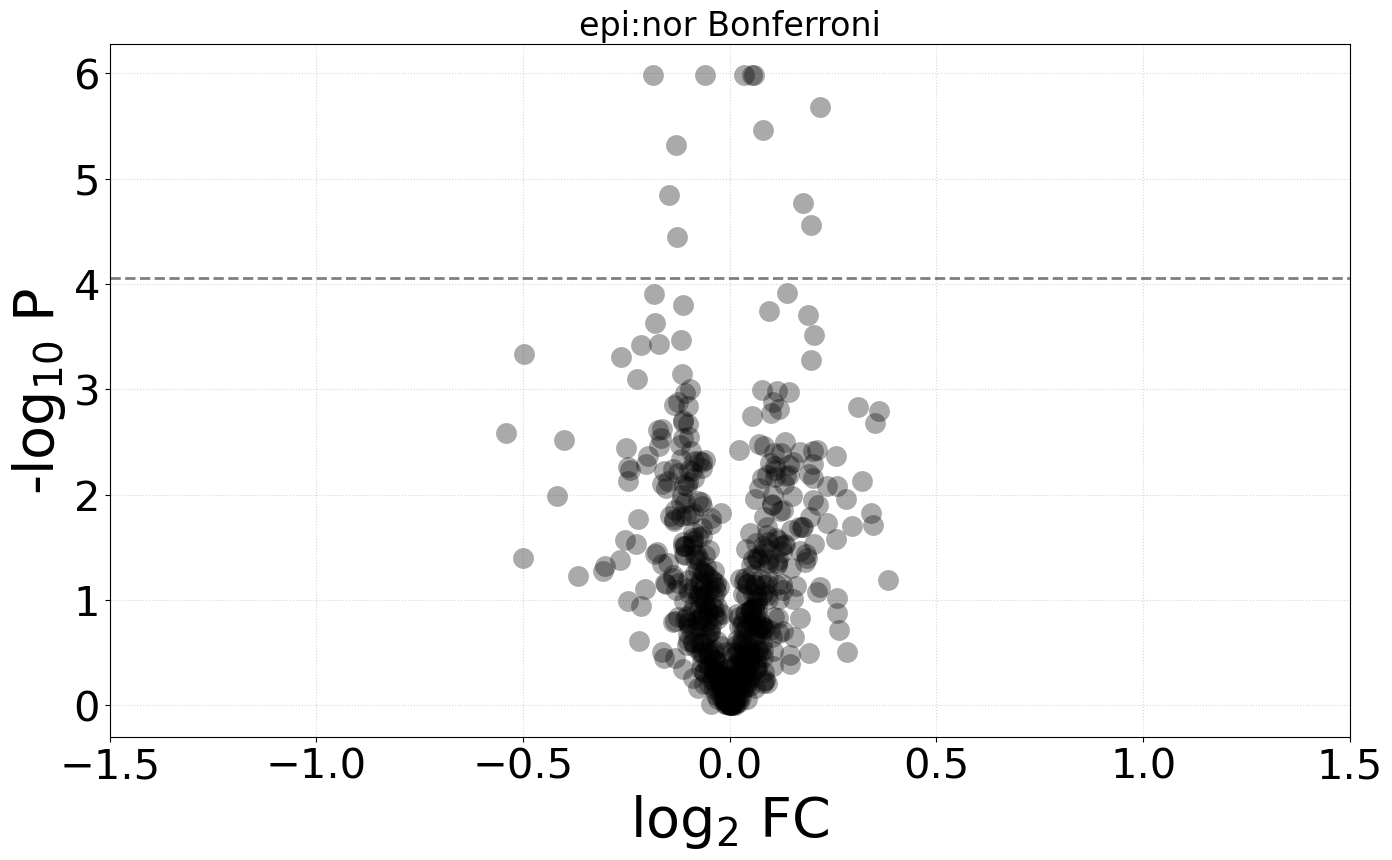

Benjamini-Hochberg correction
epsilon: 4.006447425773152
	 P21589 5'-nucleotidase [0.28, 1.25]
	 P31943 Heterogeneous nuclear ribonucleoprotein H [0.34, 1.17]
	 Q5M9N0 Coiled-coil domain-containing protein 158 [0.32, 1.36]
	 Q5JSZ5 Protein PRRC2B [0.35, 1.57]
	 Q9UKX3;Q6PJF5 Myosin-13 [-0.50, 1.94]
	 P29692 Elongation factor 1-delta [0.35, 1.11]
	 P04350 Tubulin beta-4A chain [-0.54, 1.51]
	 Q04637 Eukaryotic translation initiation factor 4 gamma 1 [0.30, 1.10]
	 P14868 Aspartate--tRNA ligase_ cytoplasmic [-0.26, 1.93]
	 P33176 Kinesin-1 heavy chain [0.36, 1.63]
	 Q9Y6E2 eIF5-mimic protein 1 [0.31, 1.64]
	 Q14669 E3 ubiquitin-protein ligase TRIP12 [-0.40, 1.48]
	 P78417 Glutathione S-transferase omega-1 [-0.42, 1.28]


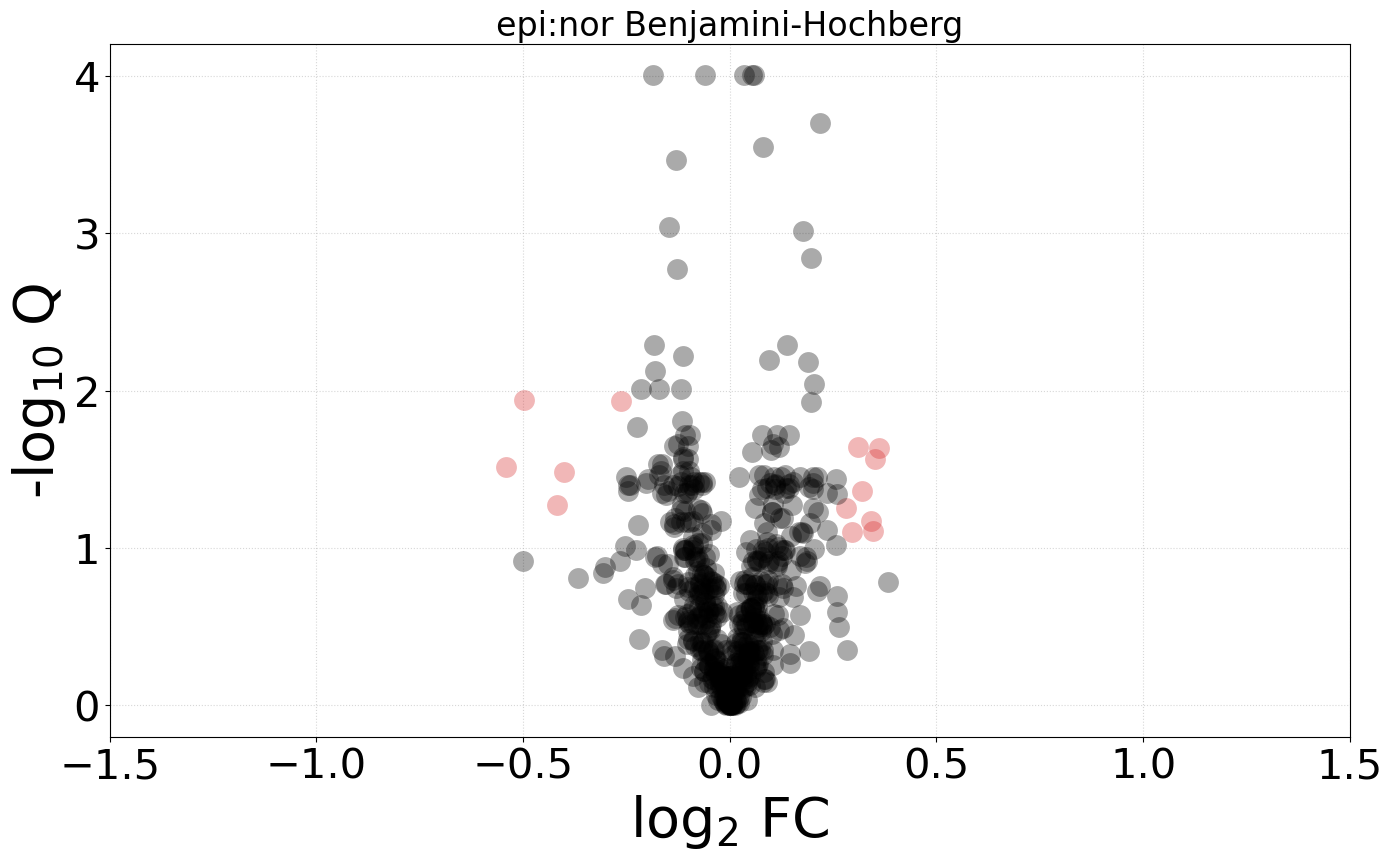

13 proteins respond to treatment


In [21]:
treatment_label = 'epi:nor'
treatment_color = 'tab:red'
control_samples = ['20220905_ARNAR_' + element for element in ['010', '011']]
treated_samples = ['20220905_ARNAR_' + element for element in ['025', '024', '026', '027']]
epinor_response = comparison_function(treatment_label, treatment_color, control_samples, treated_samples)

### Venn diagram of treatmens

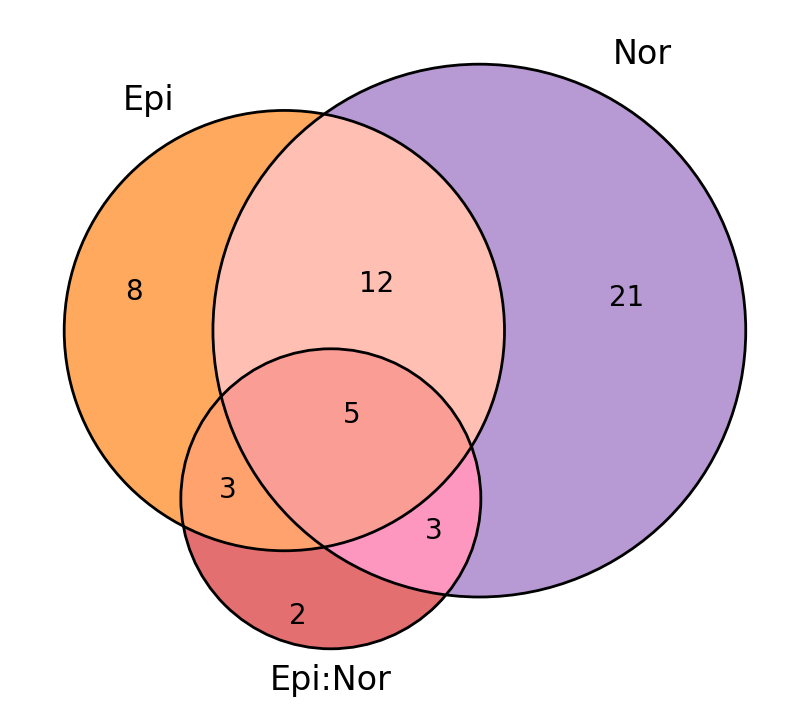

In [22]:
matplotlib_venn.venn3(
    [set(epi_response), set(nor_response), set(epinor_response)], 
    set_labels=('Epi', 'Nor', 'Epi:Nor'),
    set_colors=('tab:orange', 'tab:purple', 'tab:red'),
    alpha=2/3
)
matplotlib_venn.venn3_circles(
    [set(epi_response), set(nor_response), set(epinor_response)],
    linewidth=2
)
matplotlib.pyplot.show()